In [26]:
import pandas as pd
import numpy as np
from func_code.evaluate import Evaluate
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
eval_obj = Evaluate(filepath_model_lr="results/models/lr_model_2023-04-27_05-46-03.pkl", filepath_siamese="results/siameseBERT/siamese_bert_model_0.pth", load_lr=True)
df = pd.read_csv("test_results.csv", index_col=None)
df.head()

,Unnamed: 0,abstract_id,entrez_id_text,text,terms,entrez_id_term,is_acronym,common_tokens,bigram_similarity,is_small_string_substring,...,prefix_combined,suffix_combined,is_same_numbers,different_tokens,soft_tfidf_similarity,levenshtein_similarity,jaro_winkler_similarity,pred,is_success,siamese_pred
0,0,15096576,10018,Rpp30,Q8WYM0_HUMAN,10556,0,set(),0.000000,0,...,"('rpp', 'q8w')","('p30', 'man')",0,"{'q8wym0_human', 'rpp30'}",0.0,0.083333,0.427778,6.810177e-04,0,0.000024
1,1,10235267,10019,SREBP-1a,Signal transduction protein Lnk,6720,0,set(),0.000000,0,...,"('sre', 'sig')","(' 1a', 'lnk')",0,"{'1a', 'protein', 'lnk', 'transduction', 'sign...",0.0,0.129032,0.513710,9.361422e-07,0,0.000024
2,2,9694715,1002,actin-binding protein (ABP)-280,"cadherin 4, type 1",2318,0,set(),0.093023,0,...,"('act', 'cad')","('280', 'e 1')",0,"{'cadherin', '1', '(abp)', 'protein', '4,', 'b...",0.0,0.225806,0.545699,3.169493e-18,0,0.000024
3,3,9223106,1001,PS1,CDHP,5663,0,set(),0.000000,0,...,"('ps1', 'cdh')","('ps1', 'dhp')",0,"{'ps1', 'cdhp'}",0.0,0.000000,0.000000,7.369607e-08,0,0.000024
4,4,10625670,1001,CaBP2,CDHP,51475,0,set(),0.000000,0,...,"('cab', 'cdh')","('bp2', 'dhp')",0,"{'cabp2', 'cdhp'}",0.0,0.400000,0.670000,1.759538e-05,0,0.000024


In [28]:
df_rows_per_ID = df.groupby("entrez_id_term").size().reset_index(name="n_rows")
df_rows_per_ID

,entrez_id_term,n_rows
0,12,71
1,142,312
2,182,132
3,239,66
4,242,86
...,...,...
651,197258,76
652,204851,80
653,348932,81
654,353376,63


Mean: 127.8 Median: 86.5


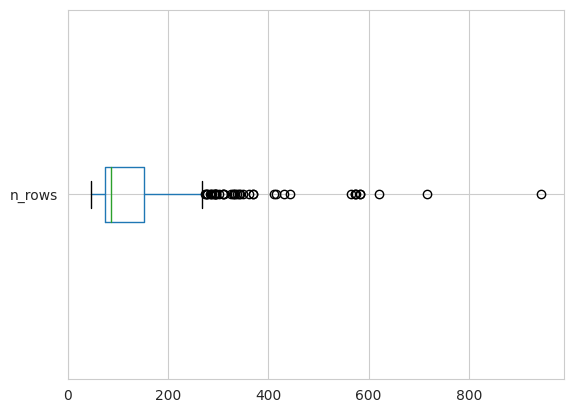

In [29]:
print(f"Mean: {round(df_rows_per_ID['n_rows'].mean(), 2)} Median: {round(df_rows_per_ID['n_rows'].median(), 2)}")
df_rows_per_ID.boxplot("n_rows", vert=False);


# sns.set_style("whitegrid")
# box_plot = sns.boxplot(x="n_rows",data=df_rows_per_ID)

# medians = df_rows_per_ID.groupby(['n_rows']).median()
# vertical_offset = df_rows_per_ID['n_rows'].median() * 0.05 # offset from median for display

# for xtick in box_plot.get_xticks():
#     box_plot.text(xtick,medians[xtick] + vertical_offset,medians[xtick], 
#             horizontalalignment='center',size='x-small',color='w',weight='semibold')

In [30]:
df_eval_results = eval_obj.generate_multi_eval_results(df=df, top_N_ranks=range(1, 100))
df_eval_results

/data/cmokashi/bc2gn_v2/func_code/evaluate.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[rank_colname] = df.groupby("entrez_id_term")[pred_colname].rank(method="first", ascending=False)
/data/cmokashi/bc2gn_v2/func_code/evaluate.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[rank_colname] = df[rank_colname].astype(int)
/data/cmokashi/bc2gn_v2/func_code/evaluate.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

,model,top,success,fail,accuracy_perc
0,lr,1,506,64,88.771930
1,lr,2,546,24,95.789474
2,lr,3,559,11,98.070175
3,lr,4,562,8,98.596491
4,lr,5,562,8,98.596491
...,...,...,...,...,...
193,siamese,95,323,247,56.666667
194,siamese,96,323,247,56.666667
195,siamese,97,323,247,56.666667
196,siamese,98,323,247,56.666667


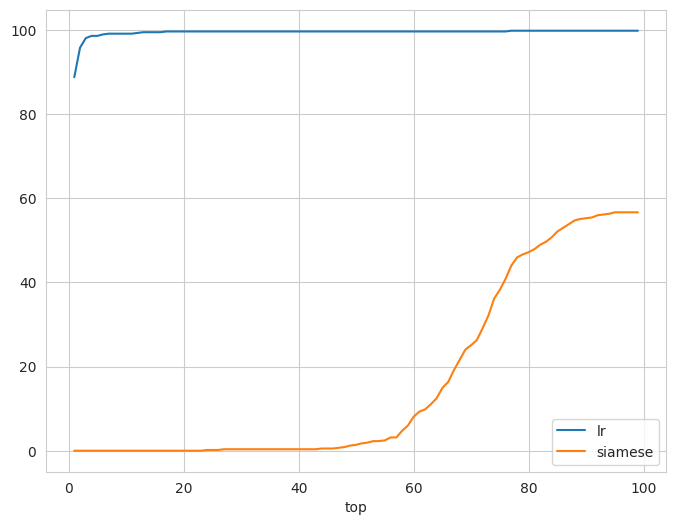

In [31]:
fig, ax = plt.subplots(figsize=(8,6))
for label, df in df_eval_results.groupby("model"):
    # df_eval_results["accuracy_perc"].plot(ax=ax, label=label)
    df.plot(x="top", y="accuracy_perc", label=label, ax=ax)